In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as spla

# Parameters
L = 1.0          # Length of the domain
T = 0.01          # Total time
M = 100          # Number of spatial points
N = 500          # Number of time steps
D = 0.1          # Diffusion coefficient

# Derived parameters
dx = L / M       # Spatial step size
dt = T / N       # Time step size
alpha = D * dt / dx**2  # Stability parameter

# Grid
x = np.linspace(0, L, M)
u = np.zeros((N,M))

### Explicit finite difference method (double for loop)

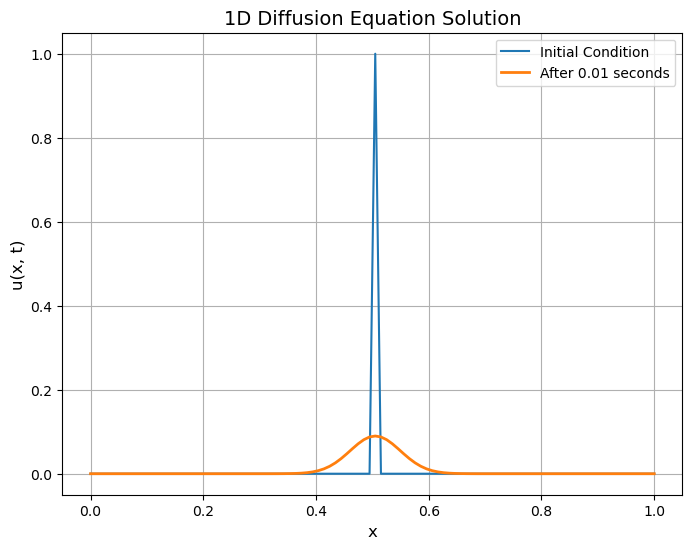

In [2]:
# Initial condition: delta function
u[0,int(M/2)] = 1

for n in range(0,N-1):
   for i in range(1,M-1):
      u[n+1,i] = u[n,i] + alpha*(u[n,i+1] - 2*u[n,i] + u[n,i-1]) 

# Boundary condition
u[:,0] = 0
u[:,M-1] = 0



# Plot the initial and final solutions
plt.figure(figsize=(8, 6))
plt.plot(x, u[0], label="Initial Condition")
plt.plot(x, u[-1], label=f"After {T:.2f} seconds", lw=2)
plt.title("1D Diffusion Equation Solution", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("u(x, t)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()